### Student Performance Indicator


**Life cycle of Machine learning Project**
```
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

```
 

#### 1) Problem statement
```
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
```

#### 2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.


#### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
stud_df = pd.read_csv('data/stud.csv')
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# shape of data

stud_df.shape

(1000, 8)

#### 2.2 Dataset information
1. gender : sex of students -> (Male/female)
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
4. lunch : having lunch before test (standard or free/reduced)
5. test preparation course : complete or not complete before test
6. math score
7. reading score
8. writing score


#### 3. Data Checks to perform
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column


##### Check Missing values

In [4]:
stud_df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### Check Duplicates

In [5]:
stud_df.duplicated().sum()

0

##### Check DataTypes

In [6]:
stud_df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

##### Check Unique values in columns

In [8]:
stud_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### Check Statistics of data

In [10]:
stud_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights

```
1. Avg score of all subject lies b/w 66 to 70
2. In reading students perform well - Be it min marks or Avg marks or median marks
3. Stad deviation lies b/w 14 to 16
```

### Data Exploration

In [13]:
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [45]:
# Numerical and Categorical Variables

numerical_variable = [var for var in stud_df if stud_df[var].dtypes!='O']
print("Numerical Variables are: ",numerical_variable)

categorical_variable = [var for var in stud_df if stud_df[var].dtypes=='O']
print("Categorical Variables are: ",categorical_variable)


Numerical Variables are:  ['math_score', 'reading_score', 'writing_score']
Categorical Variables are:  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [54]:
print("Unique values in 'gender' columns: ",end=" ")
print(stud_df['gender'].unique(),end="\n-----------------------------------------\n\n")

print("Unique values in 'race_ethnicity' columns: ",end=" ")
print(stud_df['race_ethnicity'].unique(),end="\n-----------------------------------------\n\n")

print("Unique values in 'parental_level_of_education' columns: ",end=" ")
print(stud_df['parental_level_of_education'].unique(),end="\n-----------------------------------------\n\n")

print("Unique values in 'lunch' columns: ",end=" ")
print(stud_df['lunch'].unique(),end="\n-----------------------------------------\n\n")

print("Unique values in 'test_preparation_course' columns: ",end=" ")
print(stud_df['test_preparation_course'].unique(),end="\n\n")

Unique values in 'gender' columns:  ['female' 'male']
-----------------------------------------

Unique values in 'race_ethnicity' columns:  ['group B' 'group C' 'group A' 'group D' 'group E']
-----------------------------------------

Unique values in 'parental_level_of_education' columns:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-----------------------------------------

Unique values in 'lunch' columns:  ['standard' 'free/reduced']
-----------------------------------------

Unique values in 'test_preparation_course' columns:  ['none' 'completed']



### Adding columns for "Total Score" and "Average"

In [62]:
stud_df['total_score'] = stud_df['math_score']+stud_df['reading_score']+stud_df['writing_score']

stud_df['avg_score'] = round((stud_df['math_score']+stud_df['reading_score']+stud_df['writing_score'])/3,2)
stud_df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [75]:
# Student getting full Marks
reading_full = stud_df[stud_df['reading_score'] == 100]['reading_score'].count()
math_full = stud_df[stud_df['math_score'] == 100]['math_score'].count()
writing_full = stud_df[stud_df['writing_score'] == 100]['writing_score'].count()


print("No of student got full marks in Maths: {}".format(math_full))
print("No of student got full marks in Reading: {}".format(reading_full))
print("No of student got full marks in Writing: {}".format(writing_full))

No of student got full marks in Maths: 7
No of student got full marks in Reading: 17
No of student got full marks in Writing: 14


In [78]:
# Student getting less than 20 

reading_less20 = stud_df[stud_df['reading_score'] < 20]['reading_score'].count()
math_less20 = stud_df[stud_df['math_score'] < 20]['math_score'].count()
writing_less20 = stud_df[stud_df['writing_score'] < 20]['writing_score'].count()


print("No of student got less than 20 marks in Maths: {}".format(math_less20))
print("No of student got less than 20 marks in Reading: {}".format(reading_less20))
print("No of student got less than 20 marks in Writing: {}".format(writing_less20))

No of student got less than 20 marks in Maths: 4
No of student got less than 20 marks in Reading: 1
No of student got less than 20 marks in Writing: 3


**Insights**

1. Students performance is bad in Maths as compared to others subject
2. Student performed best in Reading

### 4. Data Vizualization

### 4.1 Visualize average score distribution to make some conclusion.
```
1. Histogram
2. Kernel Distribution Function (KDE)
```

#### 4.1.1 Histogram and KDE

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

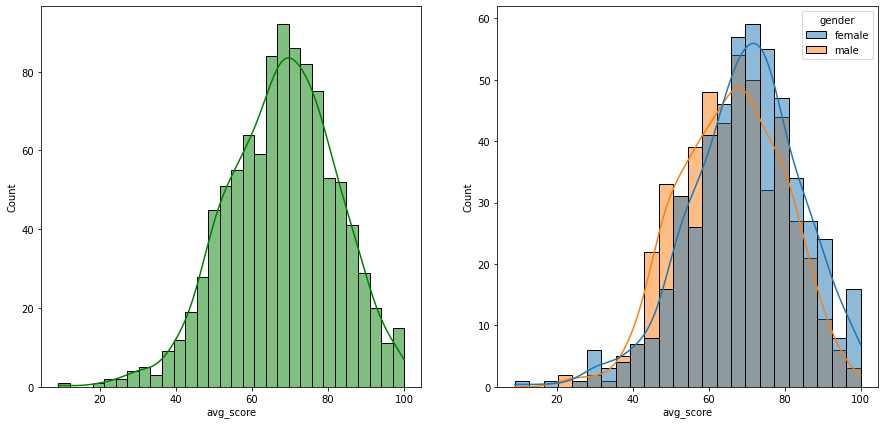

In [93]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)

sns.histplot(data=stud_df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)

sns.histplot(data=stud_df,x='avg_score',kde=True,hue='gender')


<AxesSubplot:xlabel='total_score', ylabel='Count'>

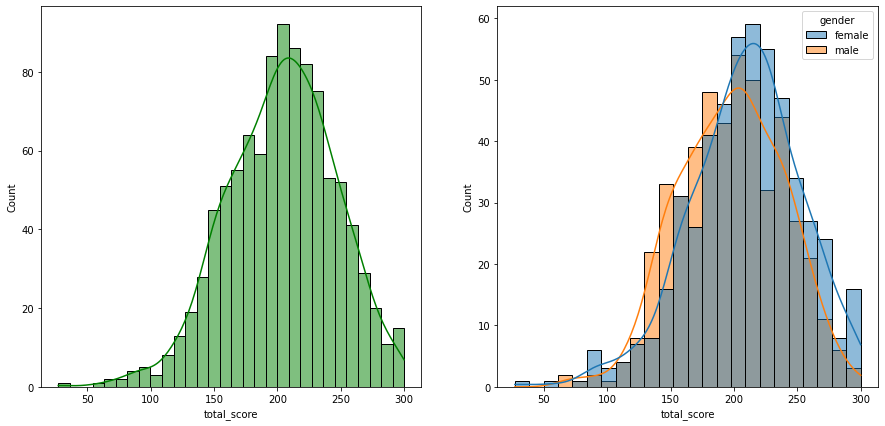

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)

sns.histplot(data=stud_df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)

sns.histplot(data=stud_df,x='total_score',kde=True,hue='gender')

#### Insights
1. Female Student Perfom better than male student

### Effect of Lunch on Score

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

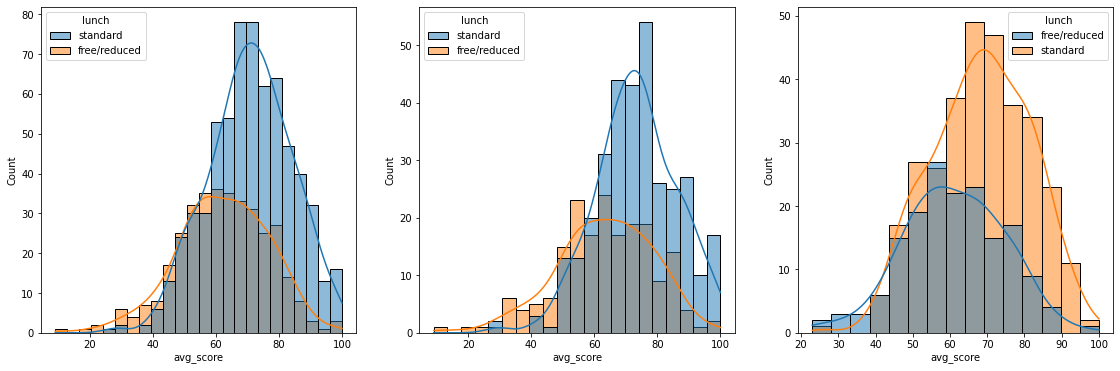

In [105]:
fig, axs = plt.subplots(1, 3, figsize=(26, 6))

plt.subplot(141)
sns.histplot(data=stud_df,x='avg_score',kde=True,hue='lunch')

plt.subplot(142)
sns.histplot(data=stud_df[stud_df['gender']=='female'],x='avg_score',kde=True,hue='lunch')

plt.subplot(143)
sns.histplot(data=stud_df[stud_df['gender']=='male'],x='avg_score',kde=True,hue='lunch')
# sns.histplot(data=stud_df,x='total_score',kde=True,hue='gender')

#### Insights
1. Standard Lunch Helps in Scoring Good for both male and Female

### Effect of Parental Education on Score

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

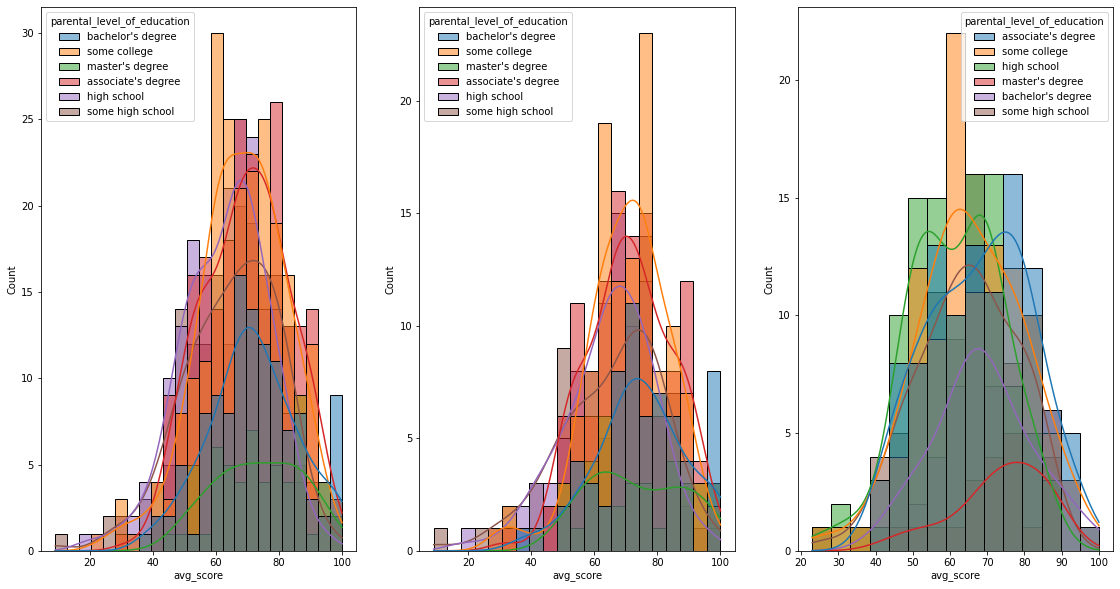

In [135]:
fig,axe = plt.subplots(1,3,figsize=(26,10))

plt.subplot(141)
sns.histplot(data=stud_df,x="avg_score",kde=True,hue="parental_level_of_education")

plt.subplot(142)
sns.histplot(data=stud_df[stud_df['gender']=="female"],x="avg_score",kde=True,hue="parental_level_of_education")

plt.subplot(143)
sns.histplot(data=stud_df[stud_df['gender']=="male"],x="avg_score",kde=True,hue="parental_level_of_education")

#### Insights
```
1. **Overall** - From best to wrost
some college > assosite's degree >high school > some high school > bacholor's degree > master's degree

2. **Girls** - From best to wrost
some college > assosite's degree >high school > some high school > bacholor's degree > master's degree

3. **Boys** - From best to wrost
some college> high school > assosite's degree> some high school > bacholor's degree > master's degree


```
* Students Parents who have attended **some college** performed best
* Students Parents who have attended completed  **master's degree** performed wrost

#### Performace based on Race Ethnicity

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

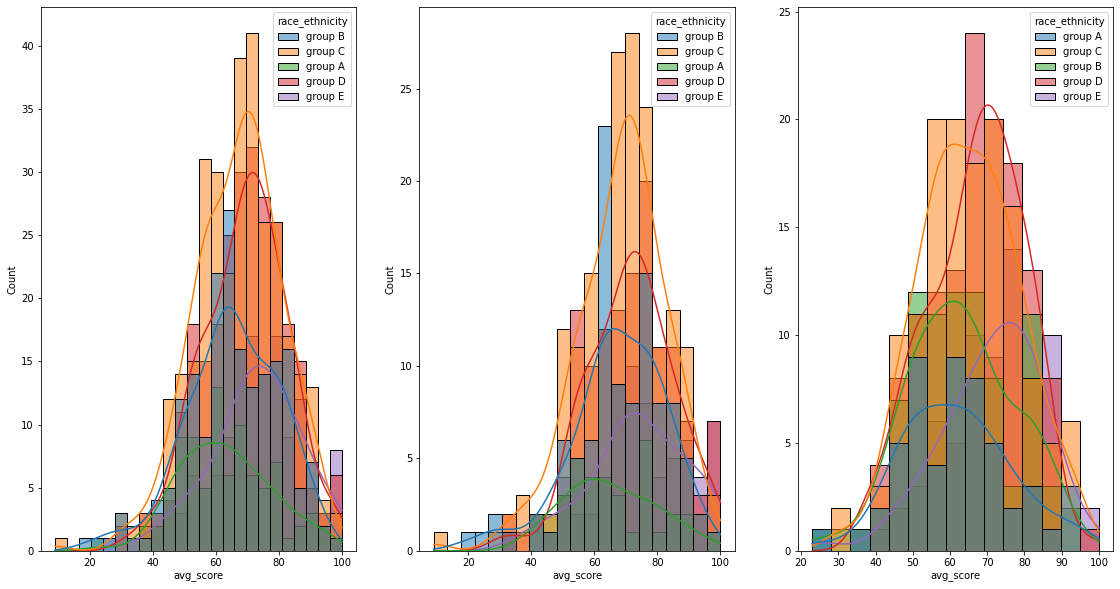

In [136]:
fig,axe = plt.subplots(1,3,figsize=(26,10))

plt.subplot(141)
sns.histplot(data=stud_df,x="avg_score",kde=True,hue="race_ethnicity")

plt.subplot(142)
sns.histplot(data=stud_df[stud_df['gender']=="female"],x="avg_score",kde=True,hue="race_ethnicity")

plt.subplot(143)
sns.histplot(data=stud_df[stud_df['gender']=="male"],x="avg_score",kde=True,hue="race_ethnicity")

#### Insights

1. **Group A** performed wrost and **group D** performed best

#### Performace based on Test Preparation Course

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

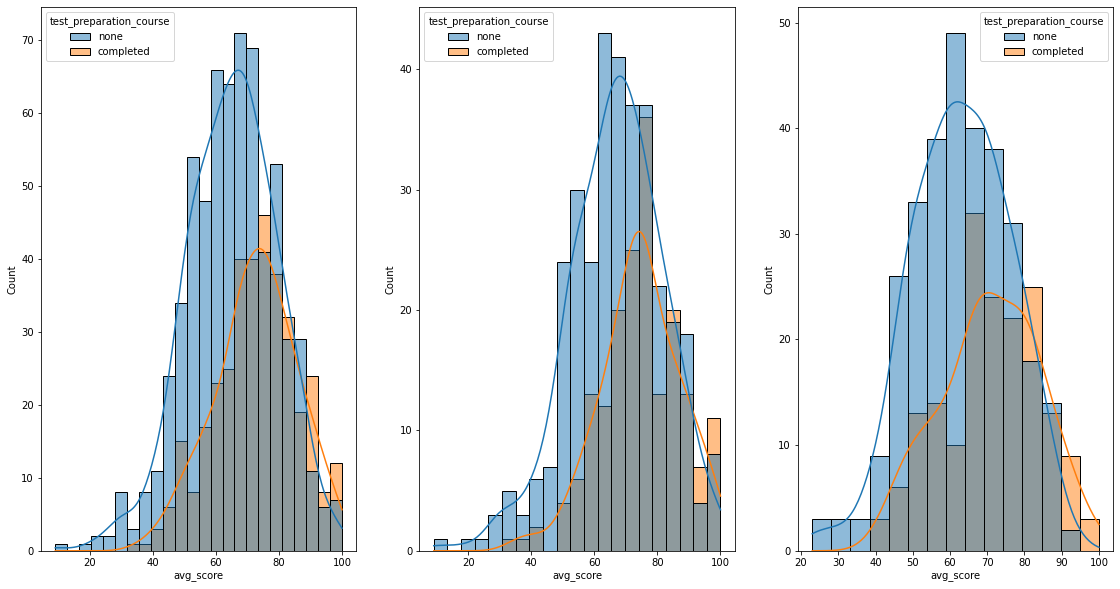

In [140]:
fig,axe = plt.subplots(1,3,figsize=(26,10))

plt.subplot(141)
sns.histplot(data=stud_df,x="avg_score",kde=True,hue="test_preparation_course")

plt.subplot(142)
sns.histplot(data=stud_df[stud_df['gender']=="female"],x="avg_score",kde=True,hue="test_preparation_course")

plt.subplot(143)
sns.histplot(data=stud_df[stud_df['gender']=="male"],x="avg_score",kde=True,hue="test_preparation_course")

#### Insights
Students who didn't took any Test Preparation Performed well


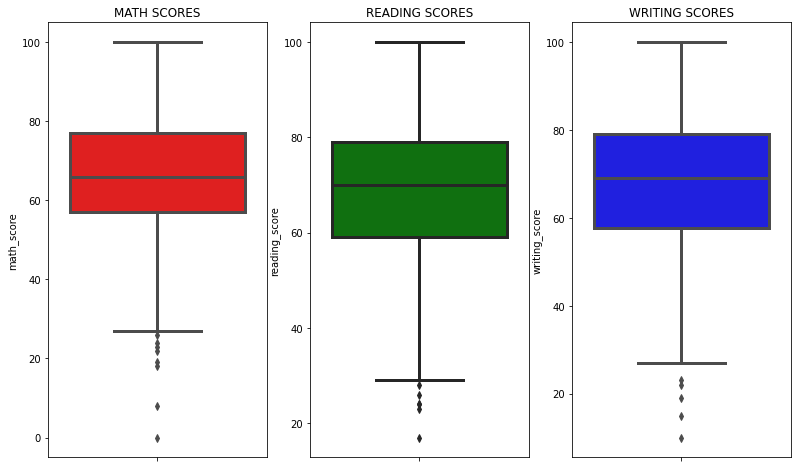

In [148]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=stud_df,color='red',linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=stud_df,color='green',linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=stud_df,color='blue',linewidth=3)

plt.show()

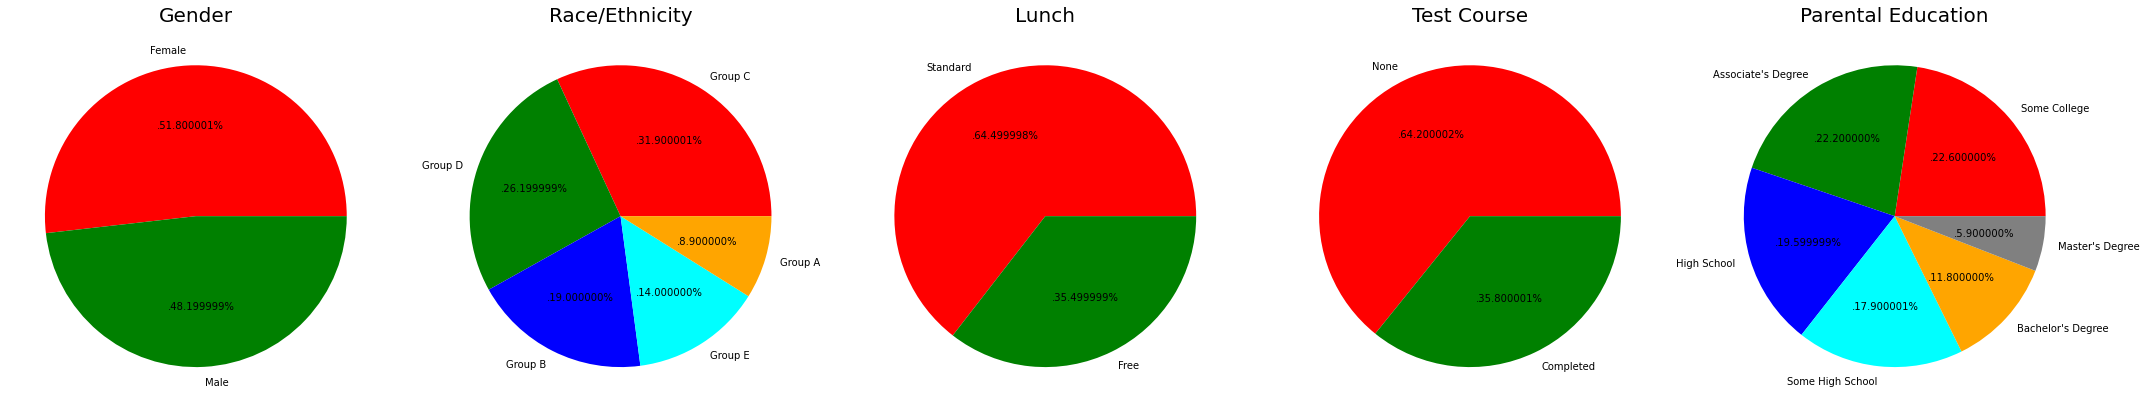

In [153]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = stud_df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = stud_df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = stud_df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = stud_df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = stud_df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

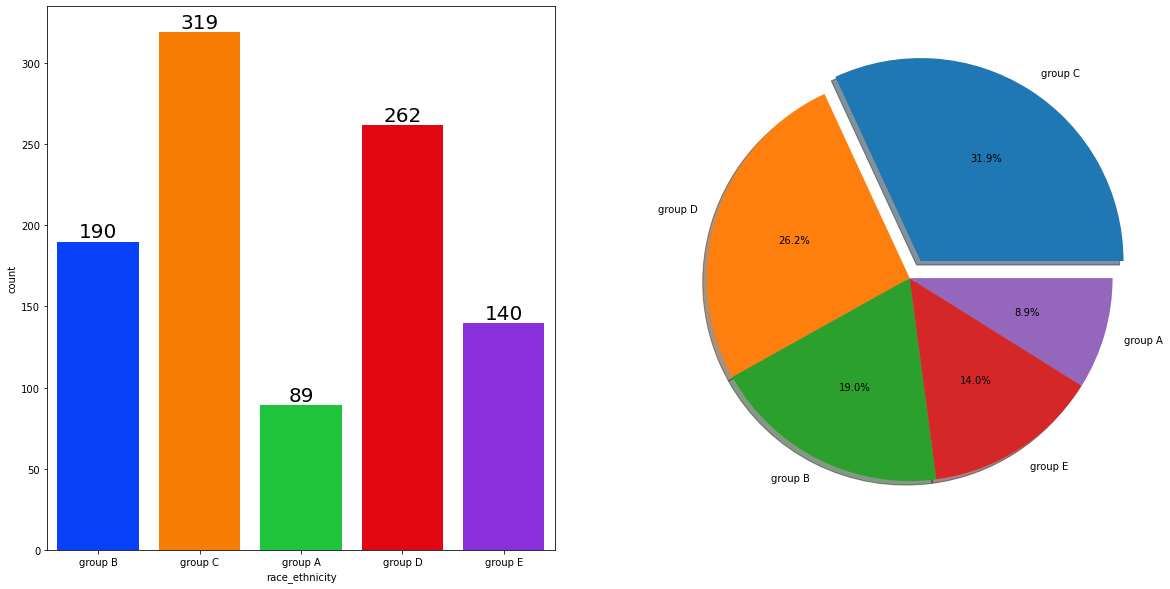

In [156]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=stud_df['race_ethnicity'],data=stud_df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = stud_df['race_ethnicity'].value_counts(),labels=stud_df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 